In [29]:
import matplotlib.pyplot as plt
import json
import skimage.io as io
import matplotlib.pyplot as plt
import os
import random
import numpy as np
from collections import Counter
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import single_meteor_score
from rouge import Rouge
from pycocoevalcap.cider.cider_scorer import CiderScorer
from tqdm import tqdm

In [ ]:
p1 = 'orig_data/vqa_v2.0/v2_OpenEnded_mscoco_test2015_questions.json'
#p2 = '/home/btp/pg_aa_1/pythia/test_best_model.json'
p2 = '/home1/BTP/pg_aa_1/btp/results/pythia_cycle_consistent/29/best_model_predict_test.json'

res = json.load(open(p2,'r'))
ques = json.load(open(p1,'r'))

In [ ]:
qqa = {}
for q in ques['questions']:
    qqa[q['question_id']] = q

In [ ]:
indices = random.choices(range(0,len(res)),k=50)


In [ ]:
for i in indices:
    r = res[i]
    q_id = r['question_id']
    ans = r['answer']
    question = qqa[q_id]['question']
    imgId = qqa[q_id]['image_id']
    imgFilename = 'orig_data/vqa_v2.0/test2015/' + 'COCO_test2015_'+ str(imgId).zfill(12) + '.jpg'
    
    if os.path.isfile(imgFilename):
        I = io.imread(imgFilename)
        plt.imshow(I)
        plt.axis('off')
        plt.show()
    print(question)
    print(ans)

# Generated Questions

In [10]:
import numpy
gq_1 = numpy.load("/home1/BTP/pg_aa_1/btp/boards/pythia_cycle_consistent/3012/gq_25000.npy", allow_pickle=True)
gq = gq_1.item()

In [15]:
import random
indices = random.choices(range(len(gq['annotations'])), k=100)

['how',
 'many',
 'sources',
 'of',
 'light',
 'are',
 'there',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>',
 '<unk>']

7

In [80]:
for i in indices :
# for i in range(len(gq['annotations'])):
    entry = gq['annotations'][i]
    ia = entry['imp_ans']
    oa = gq['ques_answers'][i]['orig_ans']
    if oa == ia:
        continue
    q = entry['gen_ques']
    q = q.replace('<start>', '')
    q = q.replace('<unk>', '')
    q = q.replace('<end>', '')
    q = q.strip()
    oq = gq['ques_answers'][i]['orig_ques']
    if '<end>' in oq:
        oq = oq[:oq.index("<end>")]
    oq = oq.replace('<start>', '')
    oq = oq.replace('<unk>', '')
    oq = oq.replace('<end>', '')
    oq = oq.strip()
    if(len(oq.split()) > 4):
        continue
    qgt = entry['gt_gen_ques']
#     if '<end>' in qgt:
#         qgt = qgt[:qgt.index("<end>")]
    qgt = qgt.replace('<start>', '')
    qgt = qgt.replace('<unk>', '')
    qgt = qgt.replace('<end>', '')
    qgt = qgt.strip()
    imgId = entry['image_id']
    imgFilename = 'orig_data/vqa_v2.0/val2014/' + 'COCO_val2014_'+ str(imgId).zfill(12) + '.jpg'
    
    if os.path.isfile(imgFilename):
        I = io.imread(imgFilename)
        plt.imshow(I)
        plt.axis('off')
        plt.show()
    print("Original ques : " + oq)
    print("Original Answer : " + oa)
    print("Implied Answer : " + ia)
    print("Generated ques : " + q)
    print("Ground Truth Implication : " + qgt)

NameError: name 'indices' is not defined

In [15]:
from nltk.translate.bleu_score import sentence_bleu
score_1 = 0
score_2 = 0
score_3 = 0
score_4 = 0
count = 0
for i in range(len(gq['annotations'])):
    oa = gq['ques_answers'][i]['orig_ans']
    entry = gq['annotations'][i]
    ia = entry['imp_ans']
    if oa == 'yes' or oa == 'no':
        continue
    if ia != 'yes' and ia != 'no':
        continue
    q = entry['gen_ques']
    if '<end>' in q:
        q = q[:q.index("<end>")]
    q = q.replace('<start>', '')
    q = q.replace('<unk>', '')
    q = q.replace('<end>', '')
    q = q.replace('!', '')
    q = q.strip()
    qgt = entry['gt_gen_ques']
    qgt = qgt.replace('<start>', '')
    qgt = qgt.replace('<unk>', '')
    qgt = qgt.replace('<end>', '')
    qgt = qgt.replace('!', '')
    qgt = qgt.strip()
    score_1 += sentence_bleu([qgt.split()], q.split(), weights=(1,0,0,0))
    score_2 += sentence_bleu([qgt.split()], q.split(), weights=(0.5,0.5,0,0))
    score_3 += sentence_bleu([qgt.split()], q.split(), weights=(0.33,0.33,0.33,0))
    score_4 += sentence_bleu([qgt.split()], q.split(), weights=(0.25,0.25,0.25,0.25))
    count += 1
    
score_1 /= count
score_2 /= count
score_3 /= count
score_4 /= count
print("The bleu-1 score is: "+str(score_1))
print("The bleu-2 score is: "+str(score_2))
print("The bleu-3 score is: "+str(score_3))
print("The bleu-4 score is: "+str(score_4))

/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

The bleu-1 score is: 0.7127741304049194
The bleu-2 score is: 0.6402352375461843
The bleu-3 score is: 0.5403273364643447
The bleu-4 score is: 0.40583196873568644


In [9]:
import numpy
gq_gt_1 = numpy.load("/home1/BTP/pg_aa_1/btp/boards/pythia_cycle_consistent/3009/gq_25000.npy", allow_pickle=True)
gq_gt = gq_gt_1.item()

In [ ]:
temp = gq_gt['annotations'][11]['gen_ques']
temp

In [10]:
from nltk.translate.bleu_score import sentence_bleu
score_1 = 0
score_2 = 0
score_3 = 0
score_4 = 0
count = 0
for i in range(len(gq_gt['annotations'])):
    oa = gq_gt['ques_answers'][i]['orig_ans']
    entry = gq_gt['annotations'][i]
    ia = entry['imp_ans']
    if oa == 'yes' or oa == 'no':
        continue
    if ia != 'yes' and ia != 'no':
        continue
    q = entry['gen_ques']
    if '<end>' in q:
        q = q[:q.index("<end>")]
    q = q.replace('<start>', '')
    q = q.replace('<unk>', '')
    q = q.replace('<end>', '')
    q = q.replace('!', '')
    q = q.strip()
    qgt = entry['gt_gen_ques']
    qgt = qgt.replace('<start>', '')
    qgt = qgt.replace('<unk>', '')
    qgt = qgt.replace('<end>', '')
    qgt = qgt.replace('!', '')
    qgt = qgt.strip()
    score_1 += sentence_bleu([qgt.split()], q.split(), weights=(1,0,0,0))
    score_2 += sentence_bleu([qgt.split()], q.split(), weights=(0.5,0.5,0,0))
    score_3 += sentence_bleu([qgt.split()], q.split(), weights=(0.33,0.33,0.33,0))
    score_4 += sentence_bleu([qgt.split()], q.split(), weights=(0.25,0.25,0.25,0.25))
    count += 1
    
score_1 /= count
score_2 /= count
score_3 /= count
score_4 /= count
print("The bleu-1 score is: "+str(score_1))
print("The bleu-2 score is: "+str(score_2))
print("The bleu-3 score is: "+str(score_3))
print("The bleu-4 score is: "+str(score_4))

/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/anaconda3/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

The bleu-1 score is: 0.753129973729357
The bleu-2 score is: 0.6905358886634695
The bleu-3 score is: 0.6060766515607181
The bleu-4 score is: 0.48953548617353654


# Final score calculation

In [2]:
imdb = np.load("/home1/BTP/pg_aa_1/btp/data/imdb_imps/imdb_val2014.npy", allow_pickle=True)

In [66]:
imdb[10]

{'image_name': 'COCO_val2014_000000262162',
 'image_id': 262162,
 'question_id': 262162009,
 'feature_path': 'COCO_val2014_000000262162.npy',
 'question_str': 'What is the chair made of?',
 'question_tokens': ['what', 'is', 'the', 'chair', 'made', 'of'],
 'all_answers': ['leather',
  'leather',
  'plastic',
  'plastic, vinyl, metal',
  'leather',
  'leather',
  'leather',
  'leather',
  'leather',
  'leather'],
 'valid_answers': ['leather',
  'leather',
  'plastic',
  'leather',
  'leather',
  'leather',
  'leather',
  'leather',
  'leather'],
 'is_imps': True,
 'qa_tokens': {'leather': [['is', 'the', 'chair', 'made', 'of', 'leather'],
   ['is', 'there', 'a', 'leather', 'in', 'the', 'picture']],
  'plastic': [['is', 'the', 'chair', 'made', 'of', 'plastic'],
   ['is', 'the', 'chair', 'made', 'of', 'glass'],
   ['is', 'there', 'a', 'plastic', 'in', 'the', 'picture']]},
 'qa_answers': {'leather': ['yes', 'yes'], 'plastic': ['yes', 'no', 'yes']},
 'imp_type': {'leather': [[1, 0, 0], [0, 1,

In [51]:
gq_1 = np.load("/home1/BTP/pg_aa_1/btp/boards/pythia_cycle_consistent/3012/gq_70000.npy", allow_pickle=True)
gq_2 = np.load("/home1/BTP/pg_aa_1/btp/boards/pythia_cycle_consistent/3012/gq_70001.npy", allow_pickle=True)
gq_3 = np.load("/home1/BTP/pg_aa_1/btp/boards/pythia_cycle_consistent/3012/gq_70002.npy", allow_pickle=True)
gq_1 = gq_1.item()
gq_2 = gq_2.item()
gq_3 = gq_3.item()

In [9]:
m = {}
for i in range(1,len(imdb)):
    m[imdb[i]['question_id']] = i

In [52]:
for i in range(len(gq_1['annotations'])):
    assert gq_3['annotations'][i]['ques_id'] == imdb[i+1]['question_id']
    assert gq_1['ques_answers'][i]['orig_ans'] == gq_2['ques_answers'][i]['orig_ans']
    assert gq_2['ques_answers'][i]['orig_ans'] == gq_3['ques_answers'][i]['orig_ans']

In [54]:
from pycocoevalcap.cider.cider_scorer import CiderScorer
qgtr = " ".join(qgt)
cider_scorer = CiderScorer()
cider_scorer += (q, qgt)
cider_scorer.compute_score()
max(1,2)

2

In [56]:

score_1 = 0
score_2 = 0
score_3 = 0
score_4 = 0
score_r = 0
score_m = 0
count = 0
score_max = 0
good_list = []
cider_scorer_1 = CiderScorer()
# file1 = open("hypotheses_3012.txt", "w")
# file2 = open("references_3012.txt", "w")
for i in range(1, len(imdb)):
    if not imdb[i]['is_imps']:
        continue
    chosen_ans = gq_1['ques_answers'][i-1]['orig_ans']
    num_imps = len(imdb[i]['imp_type'][chosen_ans])
    c = 0
    if(num_imps != 3):
        continue
    for j in range(num_imps):
        imp_type = np.argmax(imdb[i]['imp_type'][chosen_ans][j]) + 1
        if imp_type == 1:
            gq = gq_1
        elif imp_type == 2:
            gq = gq_2
        else:
            gq = gq_3
        assert gq['annotations'][i-1]['ques_id'] == imdb[i]['question_id']
        q = gq['annotations'][i-1]['gen_ques']
        if '<end>' in q:
            q = q[:q.index("<end>")]
        q = q.replace('<start>', '')
        q = q.replace('<unk>', '')
        q = q.replace('<end>', '')
        q = q.strip()
        qgt = imdb[i]['qa_tokens'][chosen_ans][j]
        rouge = Rouge()
        qgtr = " ".join(qgt)
#         file1.write(q+" \n")
#         file2.write(qgtr+" \n")
#         score_1 += sentence_bleu([qgt], q.split(), weights=(1,0,0,0))
#         score_2 += sentence_bleu([qgt], q.split(), weights=(0.5,0.5,0,0))
#         score_3 += sentence_bleu([qgt], q.split(), weights=(0.33,0.33,0.33,0))
        score = sentence_bleu([qgt], q.split(), weights=(0.25,0.25,0.25,0.25))
        if(score > 0.9):
            c+=1
#         score_m += single_meteor_score(qgtr, q)
#         score_r += rouge.get_scores(q, qgtr)[0]['rouge-l']['f']
#         cider_scorer_1 += (q, qgt)
        count += 1
    if c==3:
        good_list.append(i-1)
        
    
score_1 /= count
score_2 /= count
score_3 /= count
score_4 /= count
score_m /= count
score_r /= count
print("Count: "+str(count))
print("The bleu-1 score is: "+str(score_1))
print("The bleu-2 score is: "+str(score_2))
print("The bleu-3 score is: "+str(score_3))
print("The bleu-4 score is: "+str(score_4))
print("The ROUGE-L score is: "+str(score_r))
print("The METEOR score is: "+str(score_m))
print("Max BLEU-4 score is: " + str(score_max))
# print(cider_scorer_1.compute_score())
# file1.close()
# file2.close()

Count: 162459
The bleu-1 score is: 0.0
The bleu-2 score is: 0.0
The bleu-3 score is: 0.0
The bleu-4 score is: 0.0
The ROUGE-L score is: 0.0
The METEOR score is: 0.0
Max BLEU-4 score is: 0


In [61]:
len(good_list)
import random
indices = random.choices(good_list, k=5)
indices

[65807, 14524, 118522, 174628, 36951]

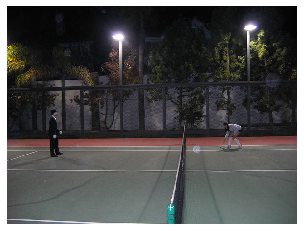

Original ques : how many lights are visible
Original Answer : 2
Implied Answer : no
Generated ques : are 2 lights visible
Ground Truth Implication : how many lights are visible


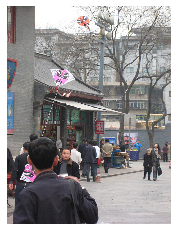

Original ques : what color is the man ' s jacket
Original Answer : black
Implied Answer : yes
Generated ques : is the man ' s jacket black
Ground Truth Implication : what color is the man ' s jacket


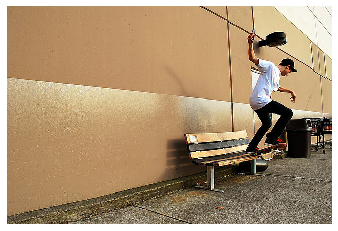

Original ques : how many benches are there
Original Answer : 1
Implied Answer : yes
Generated ques : is there 1 bench
Ground Truth Implication : how many benches are there


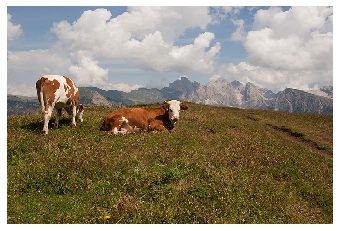

Original ques : how many cows are in the photo
Original Answer : 2
Implied Answer : no
Generated ques : are 2 cows in the photo
Ground Truth Implication : how many cows are in the photo


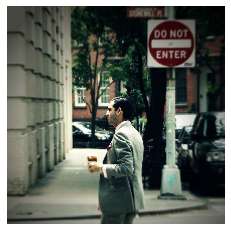

Original ques : what color is the man ' s hair
Original Answer : black
Implied Answer : yes
Generated ques : is the man ' s hair black
Ground Truth Implication : what color is the man ' s hair


In [65]:
for i in indices:
# for i in range(len(gq['annotations'])):
    entry = gq_1['annotations'][i]
    ia = entry['imp_ans']
    oa = gq_1['ques_answers'][i]['orig_ans']
#     if oa == ia:
#         continue
    q = entry['gen_ques']
    q = q.replace('<start>', '')
    q = q.replace('<unk>', '')
    q = q.replace('<end>', '')
    q = q.strip()
    oq = gq_1['ques_answers'][i]['orig_ques']
    if '<end>' in oq:
        oq = oq[:oq.index("<end>")]
    oq = oq.replace('<start>', '')
    oq = oq.replace('<unk>', '')
    oq = oq.replace('<end>', '')
    oq = oq.strip()
#     if(len(oq.split()) > 4):
#         continue
    qgt = entry['gt_gen_ques']
#     if '<end>' in qgt:
#         qgt = qgt[:qgt.index("<end>")]
    qgt = qgt.replace('<start>', '')
    qgt = qgt.replace('<unk>', '')
    qgt = qgt.replace('<end>', '')
    qgt = qgt.strip()
    imgId = entry['image_id']
    imgFilename = 'orig_data/vqa_v2.0/val2014/' + 'COCO_val2014_'+ str(imgId).zfill(12) + '.jpg'
    
    if os.path.isfile(imgFilename):
        I = io.imread(imgFilename)
        plt.imshow(I)
        plt.axis('off')
        plt.show()
    print("Original ques : " + oq)
    print("Original Answer : " + oa)
    print("Implied Answer : " + ia)
    print("Generated ques : " + q)
    print("Ground Truth Implication : " + qgt)

In [21]:
imdb_man = np.load("/home1/BTP/pg_aa_1/btp/data/imdb_manual/imdb_val2014.npy", allow_pickle=True)
imdb_rule = np.load("/home1/BTP/pg_aa_1/btp/data/imdb_imps/imdb_val2014.npy", allow_pickle=True)

In [30]:
imdb_map={}
for iminfo in tqdm(imdb_man[1:]):
    q_id = int(iminfo['question_id'] / 10)
    for item in imdb_rule[1:]:
        if item['question_id'] == q_id:
            imdb_map[q_id] = item

100%|██████████| 30963/30963 [38:17<00:00, 13.48it/s]


In [42]:
c = 0
score = 0
for iminfo in imdb_man[1:]:
    q_id = iminfo['question_id']
    imp_type = q_id % 10
    if imp_type != 3:
        continue
    q_id = int(q_id / 10)
    man_ques = iminfo['question_tokens']
    item = imdb_map[q_id]
    if item['is_imps'] and item['question_id'] == q_id:
        answer = Counter(item['valid_answers']).most_common(1)[0][0]
        index = -1
        for i in range(len(item['imp_type'][answer])):
            i_type = np.argmax(item['imp_type'][answer][i]) + 1
            if i_type == 3:
                index = i
        if index == -1:
            continue
        rule_ques = item['qa_tokens'][answer][index]
        print(answer)
        print(man_ques)
        print(rule_ques)
        score += sentence_bleu([rule_ques], man_ques, weights=(0.25,0.25,0.25,0.25))
        c += 1
final_score = score / c
print(final_score)

 13%|█▎        | 3882/30963 [00:00<00:01, 19029.19it/s]

logs
['is', 'there', 'spoon', 'laying', 'on', 'the', 'ground', 'behind', 'the', 'giraffe']
['are', 'the', 'olives', 'laying', 'on', 'the', 'ground', 'behind', 'the', 'giraffe']
brown
['is', 'the', 'horse', 'black']
['is', 'the', 'horse', 'pink']
green
['is', 'the', 'surfboard', 'yellow']
['is', 'the', 'surfboard', 'red']
brown
['is', 'the', 'person', "'", 's', 'shoes', 'blue']
['is', 'the', 'person', "'", 's', 'shoes', 'pink']
black
['are', 'they', 'wearing', 'green']
['are', 'they', 'wearing', 'white']
horse
['is', 'this', 'animal', 'a', 'dog']
['is', 'this', 'animal', 'a', 'zebra']
blue
['is', 'this', 'person', "'", 's', 'coat', 'red']
['is', 'this', 'person', "'", 's', 'coat', 'orange']
3
['are', 'there', '12', 'boats', 'visible']
['are', '4', 'boats', 'visible']
red
['is', 'the', 'man', "'", 's', 'cap', 'green']
['is', 'the', 'man', "'", 's', 'cap', 'green']
blue
['is', 'this', 'man', "'", 's', 'skis', 'white']
['is', 'this', 'man', "'", 's', 'skis', 'orange']
brown and white
['is'

 25%|██▍       | 7623/30963 [00:00<00:01, 18888.82it/s]


['is', 'this', 'food', 'blue', 'and', 'red']
['is', 'this', 'food', 'black']
silver
['is', 'the', 'car', 'next', 'to', 'the', 'bus', 'brown']
['is', 'the', 'car', 'next', 'to', 'the', 'bus', 'black']
1
['are', 'there', '7', 'people', 'in', 'the', 'water']
['are', 'there', '2', 'people', 'in', 'the', 'water']
1
['are', '4', 'lights', 'lit']
['are', '2', 'lights', 'lit']
up
['is', 'the', 'toilet', 'seat', 'down']
['is', 'the', 'toilet', 'seat', 'down']
sugar
['is', 'there', 'salt', 'in', 'the', 'bowl']
['is', 'in', 'the', 'bowl', 'syrup']
1
['are', 'there', '4', 'lamps', 'on', 'each', 'lamp', 'post']
['are', 'there', '2', 'lamps', 'on', 'each', 'lamp', 'post']
skiing
['is', 'she', 'running']
['is', 'she', 'riding']
1
['is', 'the', 'woman', 'holding', '5', 'children']
['2', 'children', 'is', 'the', 'woman', 'holding']
on
['is', 'the', 'phone', 'off']
['is', 'the', 'phone', 'off']
3
['are', 'there', '5', 'boats', 'parked', 'here']
['are', 'here', '4', 'boats', 'parked']
2
['are', 'there',

 36%|███▌      | 11082/30963 [00:00<00:01, 18047.11it/s]


['are', '7', 'people', 'wearing', 'blue']
['are', '2', 'people', 'wearing', 'blue']
15
['are', 'there', '2', 'people']
['are', '16', 'people', 'in', 'the', 'photograph']
leaves
['is', 'there', 'snow', 'all', 'over', 'the', 'street']
['is', 'all', 'over', 'the', 'street', 'cups']
1
['are', 'there', '5', 'clocks']
['are', 'there', '2', 'clocks']
cake
['is', 'there', 'mud']
['is', 'this', 'a', 'mud']
white
['is', 'the', 'dog', 'brown']
['is', 'the', 'dog', 'black']
yellow
['is', 'the', 'pizza', 'yellow']
['is', 'the', 'pizza', 'violet']
white
['is', 'the', 'floor', 'black']
['is', 'the', 'floor', 'black']
black
['is', 'the', 'plate', 'on', 'the', 'electrical', 'plug', 'white']
['is', 'the', 'plate', 'on', 'the', 'electrical', 'plug', 'white']
red
['is', 'his', 'shirt', 'black']
['is', 'his', 'shirt', 'green']
red
['is', 'the', 'raised', 'tile', 'that', 'does', 'not', 'match', 'the', 'sidewalk', 'black']
['is', 'the', 'raised', 'tile', 'that', 'does', 'not', 'match', 'the', 'sidewalk', 'g

 48%|████▊     | 14769/30963 [00:00<00:00, 18275.59it/s]


['is', 'it', 'morning']
['is', 'it', 'afternoon']
3
['are', 'there', '5', 'different', 'types', 'of', 'animasl', 'in', 'the', 'scene']
['are', '4', 'different', 'types', 'of', 'animal', 'in', 'this', 'scene']
2
['are', 'there', '5', 'toilet', 'paper', 'rolls', 'in', 'the', 'toilet']
['are', '3', 'rolls', 'of', 'toilet', 'paper', 'on', 'the', 'toilet']
living room
['is', 'this', 'the', 'bath', 'room']
['is', 'this', 'a', 'kitchen']
white
['is', 'the', 'ball', 'in', 'this', 'sports', 'black']
['are', 'the', 'balls', 'in', 'this', 'sport', 'black']
green
['are', 'the', 'plants', 'infront', 'of', 'the', 'bench', 'blue']
['are', 'the', 'plants', 'in', 'front', 'of', 'the', 'bench', 'red']
white
['is', 'her', 'jacket', 'blue']
['is', 'her', 'jacket', 'black']
red
['are', 'the', 'flowers', 'blue']
['is', 'the', 'flower', 'green']
3
['are', 'there', '5', 'different', 'colored', 'cows']
['can', 'you', 'see', '4', 'different', 'colored', 'cow']
3
['are', 'there', '6', 'people', 'in', 'the', 'im

 59%|█████▉    | 18372/30963 [00:01<00:00, 17659.34it/s]


['are', 'there', '6', 'strips', 'on', 'the', 'bus']
['does', 'the', 'bus', 'have', '2', 'stripes']
3
['are', 'there', '5', 'cars', 'in', 'the', 'photo']
['are', '4', 'cars', 'in', 'the', 'photo']
calico
['is', 'the', 'cat', "'", 's', 'fur', 'taby']
['is', 'the', 'cat', "'", 's', 'fur', 'black']
white
['is', 'there', 'a', 'red', 'ball']
['is', 'the', 'ball', 'black']
2
['are', 'there', '6', 'red', 'huts', 'visible']
['are', 'there', '3', 'visible', 'red', 'huts']
gray
['is', 'the', 'cats', 'fur', 'red']
['is', 'the', 'cat', 'red']
yellow
['is', 'the', 'stripes', 'on', 'the', 'pavement', 'blue']
['is', 'the', 'stripe', 'on', 'the', 'pavement', 'violet']
8
['are', 'there', '11', 'vegetables', 'on', 'the', 'table']
['are', '9', 'vegetables', 'in', 'the', 'image']
1
['are', 'there', '3', 'people']
['are', 'there', '2', 'planes']
truck
['is', 'the', 'person', 'sitting', 'on', 'a', 'car']
['is', 'the', 'person', 'sitting', 'on', 'the', 'car']
blue
['are', 'his', 'shorts', 'red']
['are', 'his

 71%|███████▏  | 22075/30963 [00:01<00:00, 17946.05it/s]


['is', 'this', 'picture', 'taken', 'in', 'winter']
['is', 'it', 'in', 'this', 'picture', 'fall']
buttons
['are', 'there', '3', 'lapels', 'attached', 'to', 'the', 'bag']
['are', 'the', 'three', 'things', 'attached', 'to', 'the', 'bag', 'nails']
8
['are', 'there', '5', 'peole', 'sitting', 'in', 'the', 'first', 'row']
['are', '9', 'people', 'in', 'the', 'first', 'row']
2
['are', 'there', '3', 'horses']
['can', '3', 'horses', 'be', 'seen']
red
['is', 'the', 'trash', 'can', 'blue']
['is', 'the', 'trash', 'can', 'green']
7
['are', 'there', '7', 'different', 'fruits']
['do', 'you', 'see', '8', 'different', 'fruits']
bus
['is', 'there', 'a', 'car', 'in', 'the', 'photo']
['are', 'in', 'the', 'photo', 'train']
white
['are', 'the', 'plates', 'black']
['are', 'the', 'plates', 'black']
blue
['is', 'the', 'helemet', 'red']
['is', 'the', 'helmet', 'orange']
black
['is', 'the', 'shirt', 'the', 'man', 'in', 'focus', 'is', 'wearing', 'white']
['the', 'man', 'in', 'focus', 'is', 'wearing', 'white']
afte

 84%|████████▎ | 25860/30963 [00:01<00:00, 18289.88it/s]


['is', 'the', 'girl', 'wearing', 'a', 'green', 'helmet']
['is', 'the', 'girl', 'wearing', 'a', 'black']
1
['are', '3', 'people', 'in', 'the', 'scene']
['are', '2', 'people', 'in', 'the', 'scene']
2
['are', '3', 'slices', 'being', 'served']
['are', '3', 'slices', 'being', 'served']
white
['is', 'the', 'plate', 'green']
['is', 'the', 'plate', 'black']
female
['is', 'the', 'person', 'standing', 'up', 'male']
['is', 'the', 'person', 'standing', 'up', 'a', 'male']
red
['is', 'his', 'shirt', 'blue']
['is', 'his', 'shirt', 'green']
breakfast
['is', 'there', 'lunch', 'in', 'the', 'skillet']
['is', 'in', 'the', 'skillet', 'dinner']
white
['is', 'the', 'bus', 'black']
['is', 'the', 'bus', 'black']
6
['are', '4', 'suitcases', 'on', 'the', 'floor']
['are', '7', 'suitcases', 'on', 'the', 'floor']
floor
['is', 'the', 'child', 'standing', 'on', 'a', 'chair']
['is', 'the', 'child', 'standing', 'on', 'the', 'platform']
black
['is', 'the', 'microwave', 'gray']
['is', 'the', 'microwave', 'white']
white


 96%|█████████▌| 29671/30963 [00:01<00:00, 18611.65it/s]


['are', '30', 'different', 'types', 'of', 'doughnuts', 'in', 'clear', 'view']
['are', '11', 'different', 'types', 'of', 'doughnuts', 'in', 'clear', 'view']
2
['do', 'you', 'see', '5', 'peaches']
['do', 'you', 'see', '3', 'peaches']
white
['are', 'his', 'goggles', 'black']
['is', 'his', 'goggles', 'black']
computer
['does', 'this', 'person', 'have', 'a', 'bank', 'job']
['does', 'this', 'person', 'have', 'a', 'motor']
white
['are', 'the', 'shoelaces', 'green']
['are', 'the', 'shoelaces', 'black']
closed
['are', 'the', 'zebra', "'", 's', 'eyes', 'open']
['are', 'the', 'zebra', "'", 's', 'eyes', 'open']
kitchen
['is', 'this', 'room', 'a', 'nathroom']
['is', 'this', 'a', 'bathroom']
white
['is', 'the', 'toilet', 'seat', 'red']
['is', 'the', 'toilet', 'seat', 'black']
black
['is', 'the', 'pan', 'blue']
['is', 'the', 'pan', 'white']
new
['is', 'the', 'paint', 'on', 'the', 'wall', 'old']
['is', 'the', 'paint', 'on', 'the', 'wall', 'chipped']
4
['are', '5', 'actual', 'flowers', 'visible', 'in'

100%|██████████| 30963/30963 [00:01<00:00, 18390.58it/s]


['is', 'the', 'keyboard', 'black']
['is', 'the', 'keyboard', 'black']
white
['is', 'the', 'chair', 'that', 'the', 'bear', 'is', 'sitting', 'on', 'green']
['is', 'the', 'chair', 'that', 'the', 'bear', 'is', 'sitting', 'on', 'the', 'black']
1
['are', 'there', '2', 'beds', 'in', 'the', 'room']
['are', '2', 'beds', 'in', 'the', 'room']
white
['is', 'the', 'color', 'of', 'the', 'bear', 'brown']
['is', 'the', 'color', 'of', 'the', 'bear', 'black']
left
['does', 'the', 'dog', 'have', 'his', 'nose', 'on', 'the', 'right', 'leg']
['does', 'the', 'dog', 'have', 'his', 'nose', 'on', 'the', 'right', 'leg']
trash can
['is', 'a', 'carton', 'in', 'front', 'of', 'the', 'tree']
['is', 'in', 'front', 'of', 'the', 'tree', 'crib']
music
['does', 'the', 'poster', 'promote', 'dance']
['does', 'the', 'poster', 'promote', 'speech']
2
['are', '4', 'people', 'in', 'the', 'water']
['are', '3', 'people', 'in', 'the', 'water']
1
['are', 'there', '3', 'doors', 'in', 'the', 'room']
['are', '2', 'doors', 'in', 'the',

In [18]:
imdb[7]

{'image_name': 'COCO_val2014_000000573778',
 'image_id': 573778,
 'feature_path': 'COCO_val2014_000000573778.npy',
 'question_id': 5737780031,
 'question_str': 'are there logs on the ground behind the giraffe?',
 'question_tokens': ['are',
  'there',
  'logs',
  'on',
  'the',
  'ground',
  'behind',
  'the',
  'giraffe'],
 'valid_answers': ['yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes'],
 'all_answers': ['yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes']}